# EM Cross Asset Analysis (FX, Rates and Credit)

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## EM Local vs Hard Currency Debt (2005 to 2022)

In [6]:
df = pd.read_excel('/Users/mathias/Documents/EM Rates Trading/em1_raw_data.xlsx', "Data")
df['Year'] = df['date'].dt.year
df['Year'] = df['Year'].astype(str)

BREAKDOWN OF COLUMNS IN DATASET

- **GG_dc**:  General government long-term bonds in local currency outstanding (USD bn).
- **GG_fc**:  General government long-term bonds in foreign currencies outstanding (USD bn).
- **GG_tt**:  General government long-term bonds in all currencies outstanding (USD bn).
- **GG_dc_XB**:  Foreign holdings of local currency bonds (USD bn).
- **GG_fc_XB**:  Foreign holdings of foreign-currency bonds (USD bn).
- **GG_tt_XB**:  Foreign holdings of all bonds (USD bn).
- **GG_dc_XB_pc**: Foreign investor share in local-currency bond market (% of local-currency bonds outstanding)
- **GG_share_dc_XB**: Share of local currencies in foreign holdings (% of foreign holdings in all currencies)
- **GG_share_dc**: Share of local currencies in government bonds (% of outstanding in all currencies)
- **ExchangeRate**: National currency units per US dollar, end-of-period values.

In [7]:
df

,date,quarter,country,iso,GG_dc,GG_fc,GG_tt,GG_dc_XB,GG_fc_XB,GG_tt_XB,GG_dc_XB_pc,GG_tt_XB_pc,GG_share_dc_XB,GG_share_dc,ExchangeRate,Year
0,2005-10-01,4,Argentina,AR,53.093401,51.328602,104.422002,7.541865,22.258135,29.800,14.204901,28.538046,25.308271,50.845032,3.043147,2005
1,2006-01-01,1,Argentina,AR,NaN,NaN,NaN,7.700805,25.499195,33.200,14.472681,31.579782,23.195196,50.612545,3.081626,2006
2,2006-04-01,2,Argentina,AR,NaN,NaN,NaN,8.212016,26.787984,35.000,15.258669,32.873738,23.462902,50.549187,3.091324,2006
3,2006-07-01,3,Argentina,AR,NaN,NaN,NaN,9.030800,26.369200,35.400,16.610674,33.171308,25.510735,50.944618,3.104265,2006
4,2006-10-01,4,Argentina,AR,55.662273,53.414481,109.076755,5.470265,33.029735,38.500,9.827599,35.296247,14.208481,51.030373,3.075171,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,2021-10-01,4,South Africa,ZA,214.589359,20.566300,235.155660,60.514199,9.664801,70.179,28.200000,29.843637,86.228355,91.254181,15.947819,2021
1859,2022-01-01,1,South Africa,ZA,NaN,NaN,NaN,67.792938,7.662062,75.455,28.600000,29.290614,89.845520,92.015053,14.568688,2022
1860,2022-04-01,2,South Africa,ZA,NaN,NaN,NaN,59.424655,11.474345,70.899,27.400000,29.615578,83.815926,90.593330,16.380379,2022
1861,2022-07-01,3,South Africa,ZA,NaN,NaN,NaN,55.023845,8.808155,63.832,26.800000,28.021041,86.201035,90.128456,17.988613,2022


In [10]:
df_em_debt = df[['Year', 'GG_dc', 'GG_fc']].dropna()
df_em_debt.rename(columns={"GG_dc": "Local Currency Debt", "GG_fc": "External Debt"}, inplace=True)
df_em_debt = df_em_debt.groupby(['Year'])[['External Debt', 'Local Currency Debt']].sum().reset_index()

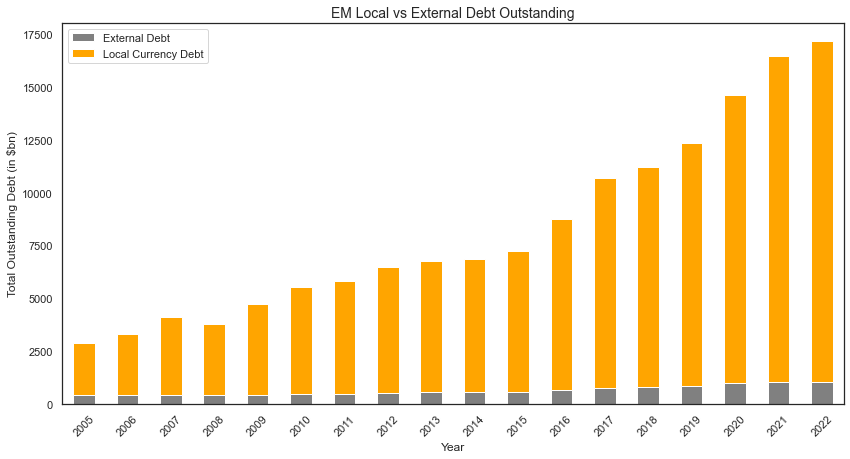

In [13]:
sns.set(style='white')
df_em_debt.set_index('Year').plot(kind='bar', stacked=True, color=['grey', 'orange'], figsize=(14,7))
plt.title('EM Local vs External Debt Outstanding', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Outstanding Debt (in $bn)')
plt.xticks(rotation=45);

In [14]:
no_of_years = len(df_em_debt)

total_lc_debt_2005 = df_em_debt[df_em_debt['Year'] == '2005'].values[0][2]
total_lc_debt_2022 = df_em_debt[df_em_debt['Year'] == '2022'].values[0][2]

total_hc_debt_2005 = df_em_debt[df_em_debt['Year'] == '2005'].values[0][1]
total_hc_debt_2022 = df_em_debt[df_em_debt['Year'] == '2022'].values[0][1]

cagr_lc_debt = (total_lc_debt_2022 / total_lc_debt_2005) ** (1 / no_of_years) - 1
cagr_hc_debt = (total_hc_debt_2022 / total_hc_debt_2005) ** (1 / no_of_years) - 1

In [19]:
print('Local sovereign debt markets have grown by a compound annual growth rate (CAGR) of {:.2%} '.format(cagr_lc_debt))
print('Hard currency sovereign debt markets have a CAGR of {:.2%} '.format(cagr_hc_debt))

Local sovereign debt markets have grown by a compound annual growth rate (CAGR) of 11.03% 
Hard currency sovereign debt markets have a CAGR of 5.35% 


- The GFC of 2008 only had a **minor effect** on the thriving growth of local debt
- This is even when **EM currencies weakened singificantly**, which had a negative effect on the USD value of local debt.
- By the end of 2022, the EM Local Debt Market totalled **USD 16.1 trillion**.

## Approximately 50% of Local Government Debt is Chinese

In [24]:
df_china_debt = df[['Year', 'GG_dc']][df['country'] == "China"].dropna()
df_china_debt['Total EM Local Currency Debt'] = df_em_debt['Local Currency Debt'].values
df_china_debt['% of Total Local Gov Debt'] = (df_china_debt['GG_dc'] / df_china_debt['Total EM Local Currency Debt']) * 100
df_china_debt['GG_dc'] = df_china_debt['GG_dc'] / 1000

In [25]:
del df_china_debt['Total EM Local Currency Debt']
df_china_debt.rename(columns={"GG_dc": "Chinese Local Debt"}, inplace=True)

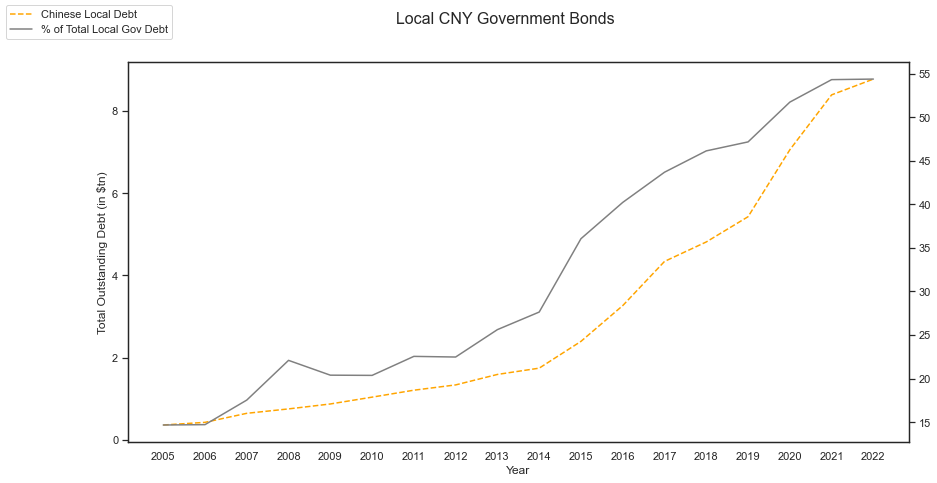

In [28]:
sns.set(style='white')

fig, ax1 = plt.subplots(figsize=(14,7))
ax2 = ax1.twinx()

ax1.plot(df_china_debt['Year'], df_china_debt['Chinese Local Debt'], color='orange', label='Chinese Local Debt', linestyle='dashed')
ax2.plot(df_china_debt['Year'], df_china_debt['% of Total Local Gov Debt'], color='grey', label='% of Total Local Gov Debt')

ax1.set_xlabel("Year")
ax1.set_ylabel("Total Outstanding Debt (in $tn)")

ax2.set_xlabel("Year")

fig.legend(loc=2)

fig.suptitle('Local CNY Government Bonds', fontsize=16)
plt.xticks(rotation=45);